# Hoja de Trabajo 8
## Redes Neuronales
---
**Integrantes**
- Maria Marta Ramirez Gil
- Gustavo Andres Gonzalez Pineda 
- Diego Alberto Leiva Pérez 
---

## Análisis Exploratorio

### Comprensión Inicial

**Importar Librerias**

In [1]:
# Analisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento de datos.
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Librerias de Redes Neuronales
from keras import Sequential
from keras import layers
from keras import callbacks

# Métricas de Validación
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix

**Cargar los Dataset**

In [2]:
# Cargar los datos
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

**Información general del dataset**

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

**Estructura del dataset**

In [5]:
print(f"El dataset de entreno contiente: {df_train.shape[0]} observaciones y {df_train.shape[1]} variables")
print(f"El dataset de test contiente: {df_test.shape[0]} observaciones y {df_test.shape[1]} variables")

El dataset de entreno contiente: 1460 observaciones y 81 variables
El dataset de test contiente: 1459 observaciones y 80 variables


In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### Identificación de Variables

Se descarta el dataset de Test ya que no contiene la variable objetivo por lo que no es posible realizar predicciones sobre esa data y evaluar el resultado.

**Variables categóricas**

In [8]:
# Encontrar variables categoricas en el dataset de entreno
categorical = df_train.select_dtypes(include=['object']).columns.tolist()

print(f"Hay {len(categorical)} variables categoricas en el dataset:")
for column in categorical:
    print(f"- {column}")


# Contar las variables categoricas binarias en el dataset de entreno
binary_categorical = [col for col in categorical if df_train[col].nunique() == 2]

print(f"\nHay {len(binary_categorical)} variables categoricas binarias en el dataset de :")
for column in binary_categorical:
    print(f"- {column}")

Hay 43 variables categoricas en el dataset:
- MSZoning
- Street
- Alley
- LotShape
- LandContour
- Utilities
- LotConfig
- LandSlope
- Neighborhood
- Condition1
- Condition2
- BldgType
- HouseStyle
- RoofStyle
- RoofMatl
- Exterior1st
- Exterior2nd
- MasVnrType
- ExterQual
- ExterCond
- Foundation
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- Heating
- HeatingQC
- CentralAir
- Electrical
- KitchenQual
- Functional
- FireplaceQu
- GarageType
- GarageFinish
- GarageQual
- GarageCond
- PavedDrive
- PoolQC
- Fence
- MiscFeature
- SaleType
- SaleCondition

Hay 4 variables categoricas binarias en el dataset de :
- Street
- Alley
- Utilities
- CentralAir


**Frecuencia de valores categóricos**

In [9]:
# Contar las variables categoricas en el dataset de entreno
for column in categorical:
    print(df_train[column].value_counts())
    print('\n', '-'*35, '\n')

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

 ----------------------------------- 

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

 ----------------------------------- 

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

 ----------------------------------- 

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

 ----------------------------------- 

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

 ----------------------------------- 

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

 ----------------------------------- 

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

 ----------------------------------- 

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

 ----------------------------------- 

Neighborhood
NAmes      225
Collg

**Variables numéricas**

In [10]:
# Encontrar variables numericas en el dataset de entreno
numerical = df_train.select_dtypes(exclude=['object']).columns.tolist()

print(f"Hay {len(categorical)} variables numericas en el dataset:")
for column in numerical:
    print(f"- {column}")

Hay 43 variables numericas en el dataset:
- Id
- MSSubClass
- LotFrontage
- LotArea
- OverallQual
- OverallCond
- YearBuilt
- YearRemodAdd
- MasVnrArea
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- LowQualFinSF
- GrLivArea
- BsmtFullBath
- BsmtHalfBath
- FullBath
- HalfBath
- BedroomAbvGr
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- GarageYrBlt
- GarageCars
- GarageArea
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal
- MoSold
- YrSold
- SalePrice


----
### Preprocesamiento y Limpieza de datos

#### Verificación y manejo de valores Nulos o faltantes

In [11]:
# Calcular el porcentaje de valores nulos para cada tipo
null_percentage_categorical = df_train[categorical].isnull().mean() * 100
null_percentage_numeric = df_train[numerical].isnull().mean() * 100

print(f"Porcentaje de data faltante en variables categoricas:")
print( null_percentage_categorical.sort_values(ascending=False))
print('\n', '-'*35, '\n')
print(f"Porcentaje de data faltante en variables numericas:")
print(null_percentage_numeric.sort_values(ascending=False))

Porcentaje de data faltante en variables categoricas:
PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
GarageType        5.547945
GarageCond        5.547945
GarageQual        5.547945
GarageFinish      5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtQual          2.534247
BsmtCond          2.534247
Electrical        0.068493
KitchenQual       0.000000
CentralAir        0.000000
Functional        0.000000
HeatingQC         0.000000
Heating           0.000000
PavedDrive        0.000000
SaleType          0.000000
MSZoning          0.000000
Street            0.000000
Condition2        0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
BldgType          0.000000
Foundation        0.000000
H

**Visualizar la data faltante**

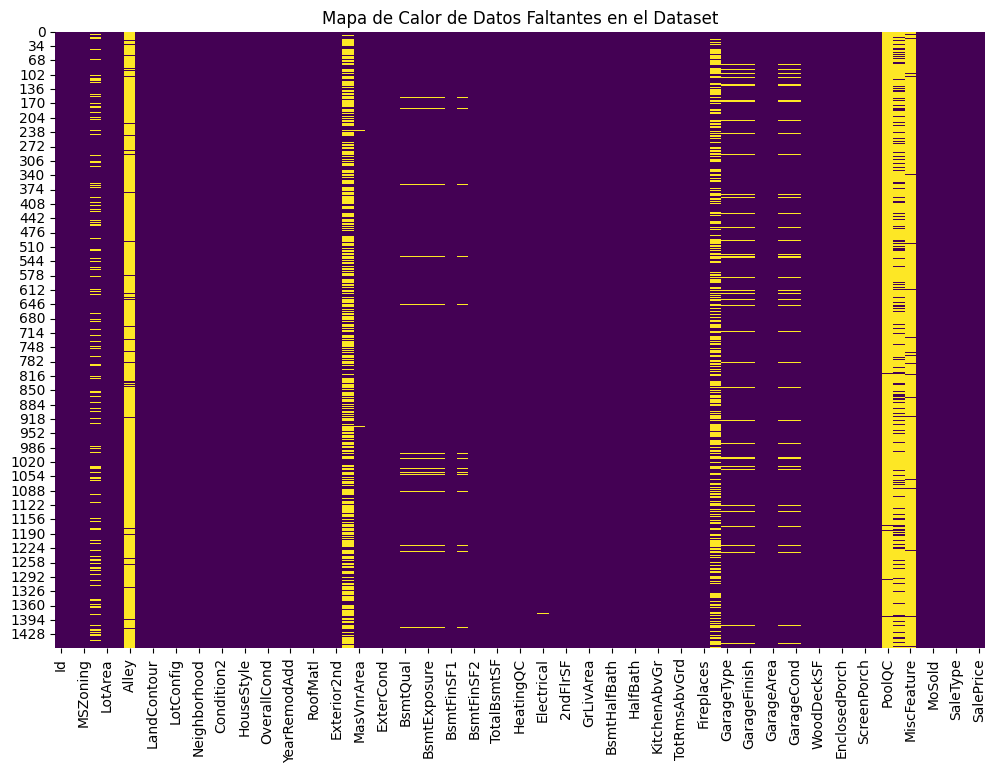

In [12]:
# Crear un mapa de calor para visualizar los datos faltante
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Datos Faltantes en el Dataset')
plt.show()

Es posible observar que hay columnas que tienen una mayor cantidad de valores faltantes, `PoolQC`, `MiscFeature`, `Fireplaces`, `Exterior2nd`, `Alley` y `MSZoning`.

Con un porcentaje mayor al 50% de los datos.

**Evaluación de impacto de eliminación de nulos**

In [13]:
data_copy = df_train.copy()

# Eliminar filas con cualquier valor nulo
data_raw_clean = data_copy.dropna()

# Verificar cuántos registros quedan después de eliminar los nulos
remaining_records = data_raw_clean.shape[0]
remaining_records_percentage = (remaining_records / data_copy.shape[0]) * 100

print(f"Si se eliminacen todas las observaciones con valores nulos, \
      \nquedarian {remaining_records} registros, \
      \n{remaining_records_percentage:.2f}% de la data original de entreno")

Si se eliminacen todas las observaciones con valores nulos,       
quedarian 0 registros,       
0.00% de la data original de entreno


Esta claro que eliminar todos los registros nulos tiene un gran impacto sobre el dataset, dejando apenas un 0% de los datos originales, en consecuencia, se ha determinado que esta no es una acción viable para el análisis.

La accion viable sera eliminar las columnas con alto porcentaje de valores faltanes e imputar valores de media o moda a las columnas con menos del 5% de valores faltantes.

In [14]:
# Eliminar las variables con gran cantidad de nulos o que no aportan información
df_train.drop(['Id',
           'PoolQC',
           'MiscFeature',
           'Alley', 
           'Fence',
           'MasVnrType',
           'FireplaceQu'], axis=1, inplace=True)

# Crear una copia de los datos
data = df_train.copy()

**Evaluación de correlación entre variables numéricas**

La variable objetivo sera la variable `SalePrice`, que servira para predecir el precio de venta de una casa.

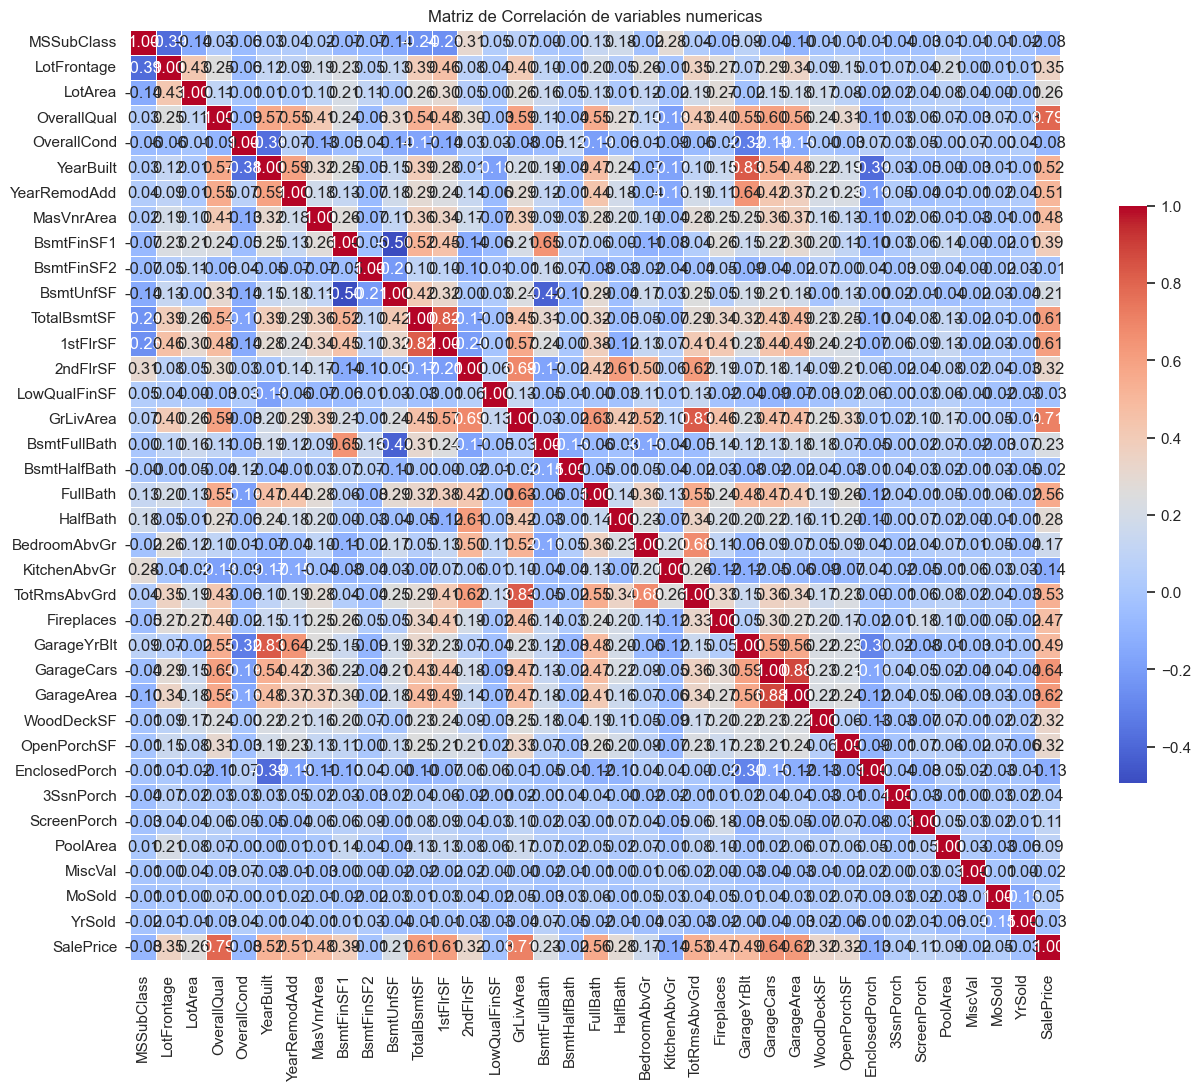

In [15]:
# Se evalua la correlacion entre las variables numericas para determinar si se pueden eliminar algunas de ellas
numerical = df_train.select_dtypes(exclude=['object']).columns.tolist()

# Calcular la correlación entre las variables numéricas
correlation_matrix = df_train[numerical].corr()

# Configurar el estilo de los gráficos
sns.set_theme(style="white")

# Crear el heatmap de la matriz de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Matriz de Correlación de variables numericas')
plt.show()

**Imputación de valores**

In [16]:
numerical = data.select_dtypes(exclude=['object']).columns.tolist()
categorical = data.select_dtypes(include=['object']).columns.tolist()

# Imputar con la moda para variables categóricas con 10% o menos de valores faltantes
for column in categorical:
    mode = data[column].mode()[0]
    data.fillna({column: mode}, inplace=True)

# Imputar con la mediana para variables numéricas con 10% o menos de valores faltantes
for column in numerical:
    median = data[column].median()
    data.fillna({column: median}, inplace=True)

In [17]:
# Verificar que ya no hay valores nulos
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

### Transformacion
Para lograr nuestro objetivo de clasificar las casas en categorías de precios bajos, medios y altos, hemos introducido una nueva columna que simplifica este proceso. Hemos definido nuestras categorías de precios como baratos, medios y altos, basados en criterios propios.

In [18]:
def categorize_price(price):
    if price < 150000:
        return 'Cheap'
    elif price < 300000:
        return 'Medium'
    else:
        return 'Expensive'

# Aplicar la función para crear la nueva columna
data['PriceCategory'] = data['SalePrice'].apply(categorize_price)

In [19]:
# Verificar la creacion de la columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [20]:
print(f"Valores únicos de la columna PriceCategory:{data['PriceCategory'].unique()}")

Valores únicos de la columna PriceCategory:['Medium' 'Cheap' 'Expensive']


## Enconding
Dado que nuestras categorías actualmente son cadenas de texto ('Medium', 'Cheap', 'Expensive'), necesitamos codificarlas para entrenar el modelo SVM. La codificación resultante será la siguiente:

- `Expensive`: 1
- `Medium`: 2
- `Cheap`: 0

In [21]:
# Inicializar el codificador
label_encoder = LabelEncoder()

# Aplicar el Label Encoding a la columna 'PriceCategory' en df_train
data['PriceCategoryEncoded'] = label_encoder.fit_transform(data['PriceCategory'])

# Ver los valores únicos y su correspondiente encoding
print(data[['PriceCategory', 'PriceCategoryEncoded']].drop_duplicates())

  PriceCategory  PriceCategoryEncoded
0        Medium                     2
3         Cheap                     0
6     Expensive                     1


In [22]:
# Aplicar el label encoding a las variables categóricas
for column in categorical:
    data[column] = label_encoder.fit_transform(data[column])

# Eliminar la columna categorica agregada
data = data.drop(['PriceCategory'], axis=1)

### Redes Neuronales Predictivas

**Seleccionar la variable objetivo**

In [23]:
X = data.drop('SalePrice', axis = 1)
y = data["SalePrice"]

print(X.shape, y.shape)

(1460, 74) (1460,)


In [24]:
#Lo convertimos en un lista de numpy
X = np.array(X)
y = np.array(y)

**Dividir el dataset en entrenamiento y prueba**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1168, 74) (292, 74) (1168,) (292,)


**Escalar la Data**

In [26]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

**Construccion del Modelo de Red Neuronal Predictiva**

In [27]:
model = Sequential() #Para construir la red de manera simple.
model.add(layers.Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) #1000 neuronas, 
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dense(1, activation='linear')) #Nodo de salida
model.summary() # Ver la arquitectura del modelo

c:\Users\diego\Documents\UVG\7mo Semestre\Mineria de Datos\HT8_Mineria\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │        75,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 701,001 (2.67 MB)

 Trainable params: 701,001 (2.67 MB)

 Non-trainable params: 0 (0.00 B)

**Compilar el Modelo**

In [28]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [29]:
es = callbacks.EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [30]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

Epoch 1/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 39421005824.0000 - mae: 181245.1719 - val_loss: 35298635776.0000 - val_mae: 170805.0938
Epoch 2/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32318902272.0000 - mae: 160882.6406 - val_loss: 20048257024.0000 - val_mae: 119208.6172
Epoch 3/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15838418944.0000 - mae: 98903.6250 - val_loss: 6289812992.0000 - val_mae: 49816.4102
Epoch 4/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6150331904.0000 - mae: 50046.2383 - val_loss: 4996344832.0000 - val_mae: 50166.2891
Epoch 5/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5771748864.0000 - mae: 52264.3281 - val_loss: 4626222592.0000 - val_mae: 46284.5039
Epoch 6/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4591018496.0000 - mae: 48398.1875 - val_loss: 4143878144.0000 - val_mae: 45425.2930
Epoch 7/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4418293248.0000 - mae: 46724.8555 - val_loss: 3846446080.0000 - val

**Resultados**

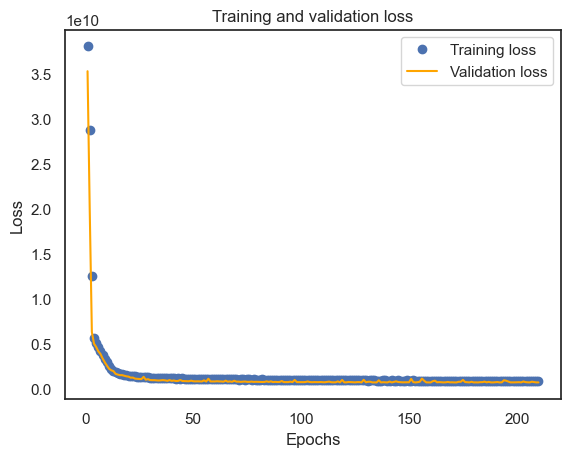

In [31]:
# Visualizar el rendimiento del modelo
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1) # Numero de Epochs, para X
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step


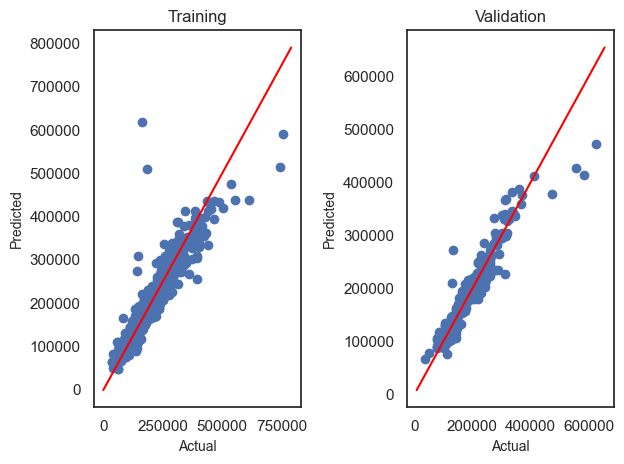

In [32]:
fig, axes = plt.subplots(1,2) # 1 fila, dos columnas


# Entrenamiento
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# Linea de 45 grados
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validacion
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# Linea de 45 grados
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')
# Pequeña separación entre gráficas.
fig.tight_layout()




**Predicciones**

In [33]:
# Predecir los precios de las casas en el dataset de test
pred = model.predict(X_test)
pred

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[209218.52 ],
       [117404.69 ],
       [149153.6  ],
       [234982.33 ],
       [139563.88 ],
       [254525.6  ],
       [331235.12 ],
       [147171.47 ],
       [158883.36 ],
       [127281.35 ],
       [155394.38 ],
       [249594.84 ],
       [137942.9  ],
       [113014.54 ],
       [272337.53 ],
       [183039.64 ],
       [132062.1  ],
       [330409.62 ],
       [210952.6  ],
       [185973.89 ],
       [170060.55 ],
       [194723.62 ],
       [109239.02 ],
       [160912.92 ],
       [202053.06 ],
       [139600.67 ],
       [217756.03 ],
       [176564.34 ],
       [117835.87 ],
       [134566.8  ],
       [135632.48 ],
       [203919.92 ],
       [137718.9  ],
       [183381.62 ],
       [360104.56 ],
       [195504.36 ],
       [180803.17 ],
       [377723.7  ],
       [191714.8  ],
       [104705.24 ],
       [156277.48 ],
       [193710.4  ],
       [184943.34 ],
       [163593.14 ],
       [229462.94 ],
       [110828.31 ],
       [366855.47 ],
       [21545

**Metricas**

In [34]:
trainpreds = model.predict(X_train)

print("MAE Entrenamiento: ",mean_absolute_error(y_train, trainpreds)) # Entrenamiento
print("MAE Prueba: ",mean_absolute_error(y_test, pred)) # Prueba

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step
MAE Entrenamiento:  16029.038978890198
MAE Prueba:  16080.946382705479


In [35]:
mse = mean_squared_error(y_test, pred)
print("MSE: ",mse)

MSE:  684146243.7506175


In [36]:
r2 = r2_score(y_test, pred)
print("R²: ", r2)

R²:  0.8892898270527837
